In [1]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import accuracy_score
from yellowbrick.model_selection import FeatureImportances
import pandas as pd
plt.style.use("ggplot")
warnings.simplefilter("ignore")
#importing requried libraries 

C:\Users\Shiva\anaconda_3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
plt.rcParams['figure.figsize'] = (12,8) #Fixing the plot size

In [18]:
CC_data_train = pd.read_excel(r"C:\Users\Project - 4 - Train Data_1.xlsx")
CC_data_train.head() #Loading Data of project 4 - train

,Unnamed: 0,Unnamed: 0.1,Loanapp_ID,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status
0,0,0,CPL001002,M,N,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,Y
1,1,1,CPL001003,M,Y,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,N
2,2,2,CPL001005,M,Y,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,Y
3,3,3,CPL001006,M,Y,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,Y
4,4,4,CPL001008,M,N,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,23293411,38-247-1410,Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKi...,Y


In [19]:
CC_data_test = pd.read_excel(r"C:\Users\Project - 4 - Test Data_1.xlsx")
CC_data_test.head() #loading data of project-4 test

,Unnamed: 0,Loanapp_ID,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,INT_ID,Prev_ID,AGT_ID,Prop_Area
0,0,CPL001015,M,Y,0,Grad,N,6864.0,0.0,132.0,360.0,1.0,6869736235,79-489-1539,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6...,Urban
1,1,CPL001022,M,Y,1,Grad,N,3691.2,1800.0,151.2,360.0,1.0,3383749711,75-757-9174,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_2)...,Urban
2,2,CPL001031,M,Y,2,Grad,N,6000.0,2160.0,249.6,360.0,1.0,7247894032,42-085-4345,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Urban
3,3,CPL001035,M,Y,2,Grad,N,2808.0,3055.2,120.0,360.0,NaN,3240492342,10-813-9695,Mozilla/5.0 (X11; Linux i686) AppleWebKit/534....,Urban
4,4,CPL001051,M,N,0,Non Grad,N,3931.2,0.0,93.6,360.0,1.0,1670564037,20-195-4948,Mozilla/5.0 (Windows NT 6.0) AppleWebKit/534.2...,Urban


In [86]:
Train_data = CC_data_train[["Dependents","Qual_var","SE","App_Income_1","App_Income_2","Credit_His","CPL_Status","Prop_Area","CPL_Amount","CPL_Term"]]
Train_data.head() #importing values which are used in decision making 

,Dependents,Qual_var,SE,App_Income_1,App_Income_2,Credit_His,CPL_Status,Prop_Area,CPL_Amount,CPL_Term
0,0,Grad,N,7018.8,0.0,1.0,Y,Urban,NaN,360.0
1,1,Grad,N,5499.6,1809.6,1.0,N,Rural,153.6,360.0
2,0,Grad,Y,3600.0,0.0,1.0,Y,Urban,79.2,360.0
3,0,Non Grad,N,3099.6,2829.6,1.0,Y,Urban,144.0,360.0
4,0,Grad,N,7200.0,0.0,1.0,Y,Urban,169.2,360.0


In [87]:
print(Train_data.columns[Train_data.isnull().any()]) 
#checking for null vaules 

Index(['Dependents', 'SE', 'Credit_His', 'CPL_Amount', 'CPL_Term'], dtype='object')


In [88]:
Train_data['Credit_His'] = Train_data['Credit_His'].fillna(0)
Train_data['Dependents'] = Train_data['Dependents'].fillna(2)
Train_data['SE'] = Train_data['SE'].fillna('Y')
Train_data['CPL_Amount'] = Train_data['CPL_Amount'].fillna(Train_data['CPL_Amount'].median())
Train_data['CPL_Term'] = Train_data['CPL_Term'].fillna(Train_data['CPL_Term'].max()) 
Train_data.loc[Train_data["Dependents"]== "3+" , "Dependents"] = 3
#filling the null values 

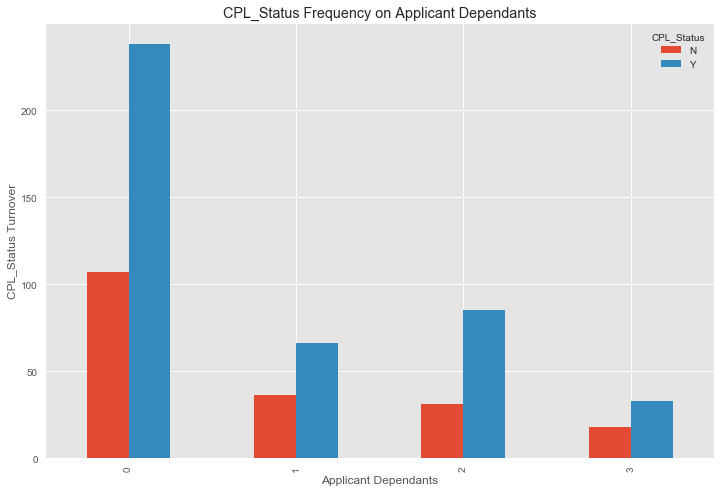

In [89]:
pd.crosstab(Train_data.Dependents,Train_data.CPL_Status).plot(kind='bar')
plt.title('CPL_Status Frequency on Applicant Dependants')
plt.xlabel('Applicant Dependants')
plt.ylabel('CPL_Status Turnover')
plt.show() #plotting the frequency of CPL_ststus with dependants 

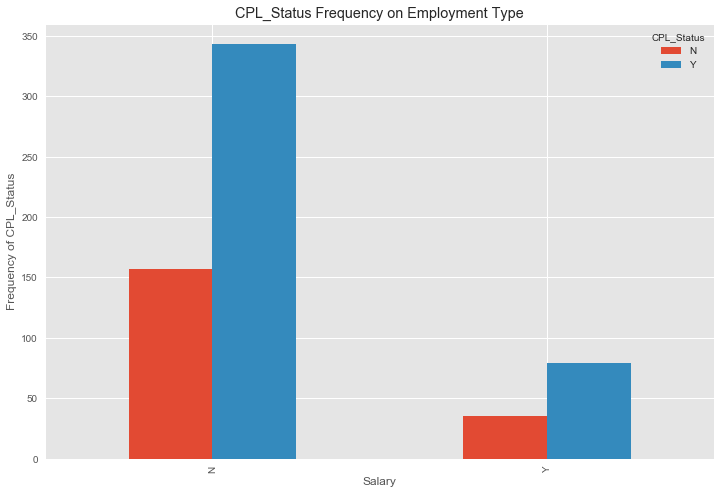

In [90]:
pd.crosstab(Train_data.SE,Train_data.CPL_Status).plot(kind='bar')
plt.title('CPL_Status Frequency on Employment Type')
plt.xlabel('Salary')
plt.ylabel('Frequency of CPL_Status')
plt.show() #plotting the frequency of CPL_ststus with SE

In [91]:
#creating dummie varaibles for string inputs
columns =  Train_data[["Qual_var","SE","CPL_Status","Prop_Area"]]  

columns =["Qual_var","SE","CPL_Status",'Prop_Area']
for var in columns:
    cat_list = pd.get_dummies(Train_data[var], prefix=var)
    Train_data1=Train_data.join(cat_list)
    Train_data=Train_data1
    Train_data = Train_data.drop(axis=0, columns = var)
Train_data.head()

,Dependents,App_Income_1,App_Income_2,Credit_His,CPL_Amount,CPL_Term,Qual_var_Grad,Qual_var_Non Grad,SE_N,SE_Y,CPL_Status_N,CPL_Status_Y,Prop_Area_Rural,Prop_Area_Semi U,Prop_Area_Urban
0,0,7018.8,0.0,1.0,153.6,360.0,1,0,1,0,0,1,0,0,1
1,1,5499.6,1809.6,1.0,153.6,360.0,1,0,1,0,1,0,1,0,0
2,0,3600.0,0.0,1.0,79.2,360.0,1,0,0,1,0,1,0,0,1
3,0,3099.6,2829.6,1.0,144.0,360.0,0,1,1,0,0,1,0,0,1
4,0,7200.0,0.0,1.0,169.2,360.0,1,0,1,0,0,1,0,0,1


In [92]:
x=Train_data
x=x.drop(axis=0, columns = ["CPL_Status_N",'CPL_Status_Y'])
y=Train_data[["CPL_Status_Y",'CPL_Status_N']]

In [93]:
x.head()

,Dependents,App_Income_1,App_Income_2,Credit_His,CPL_Amount,CPL_Term,Qual_var_Grad,Qual_var_Non Grad,SE_N,SE_Y,Prop_Area_Rural,Prop_Area_Semi U,Prop_Area_Urban
0,0,7018.8,0.0,1.0,153.6,360.0,1,0,1,0,0,0,1
1,1,5499.6,1809.6,1.0,153.6,360.0,1,0,1,0,1,0,0
2,0,3600.0,0.0,1.0,79.2,360.0,1,0,0,1,0,0,1
3,0,3099.6,2829.6,1.0,144.0,360.0,0,1,1,0,0,0,1
4,0,7200.0,0.0,1.0,169.2,360.0,1,0,1,0,0,0,1


In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
#dividing the test,train volumes

In [95]:
dtree=DecisionTreeClassifier(criterion='entropy',random_state=1
                             ,min_samples_leaf=15
                            ,min_samples_split=15).fit(x_train,y_train) 
#Decision Tree(Entropy) Syntax

In [96]:
dtree_gini=DecisionTreeClassifier(criterion='gini',random_state=1
                             ,min_samples_leaf=15
                            ,min_samples_split=15).fit(x_train,y_train)
#Decision Tree(Gini) Syntax

In [97]:
y_pred_entropy=dtree.predict(x_test) #predicting the outputs 
y_pred_entropy  

array([[1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1,

In [98]:
Score_entropy=accuracy_score(y_test,y_pred_entropy) #comparision of outputs 
print(" DecisionTree_Entropy Accuracy: %0.2f" % (round(Score_entropy*100,2)))

 DecisionTree_Entropy Accuracy: 78.05


In [99]:
y_pred_gini=dtree_gini.predict(x_test) #predicting the outputs
y_pred_gini

array([[1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1,

In [100]:
Score_gini=accuracy_score(y_test,y_pred_gini) #comparision of outputs
print("DecisionTree_Gini Accuracy: %0.2f" % (round(Score_gini*100,2)))

DecisionTree_Gini Accuracy: 78.05


In [101]:
rforest_entropy = RandomForestClassifier(random_state=1,
                                       criterion='entropy',
                                       bootstrap="False",
                                       n_estimators=200,
                                       max_depth=14,
                                       min_samples_split=5,
                                       min_samples_leaf=5,
                                       n_jobs=-1,
                                      verbose=False).fit(x_train, y_train)  
#Random forest(Entropy) Syntax

In [102]:
y_pred_entropy=rforest_entropy.predict(x_test) #predicting the outputs
y_pred_entropy

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1,

In [103]:
Score_entropy=accuracy_score(y_test,y_pred_entropy) #comparision of outputs
print(" RandomForest_Entropy Accuracy: %0.2f" % (round(Score_entropy*100,2)))

 RandomForest_Entropy Accuracy: 78.05


In [104]:
rforest_gini = RandomForestClassifier(random_state=1,
                                       criterion='gini',
                                       bootstrap="False",
                                       n_estimators=200,
                                       max_depth=14,
                                       min_samples_split=5,
                                       min_samples_leaf=5,
                                       n_jobs=-1,
                                      verbose=False).fit(x_train, y_train) 
#Random forest(Gini) Syntax

In [105]:
y_pred_gini=rforest_entropy.predict(x_test) #predicting the outputs
y_pred_entropy

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1,

In [106]:
Score_gini=accuracy_score(y_test,y_pred_gini) #comparision of outputs
print("Accuracy: %0.2f" % (round(Score_gini*100,2)))

Accuracy: 78.05


In [108]:
#LogisticRegression Syntax and visualization
logit = LogisticRegressionCV(random_state=1, n_jobs=-1,max_iter=500,
                             cv=10)

lr = logit.fit(x_train, y_train)

print('Logistic Regression Accuracy: {:.2f}'.format((accuracy_score(y_test, lr.predict(x_test))*100)))

visualizer = ROCAUC(lr, classes=["Y", "N"])


visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.poof();


ValueError: bad input shape (491, 2)

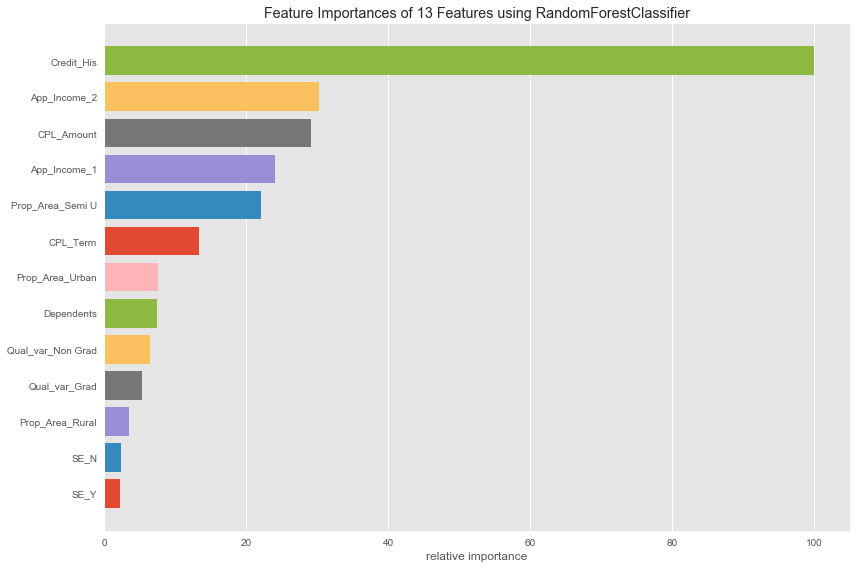

In [109]:
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

rf = RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=False,
            warm_start=False)

viz = FeatureImportances(rf)
viz.fit(x_train, y_train)
viz.show();   
#plot to show the parameter which is highly impacting the decision for RandomForest

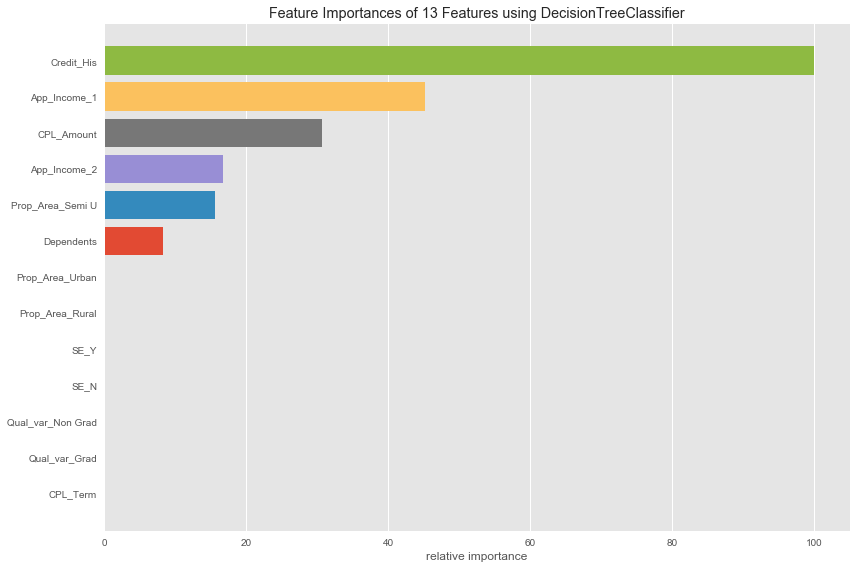

In [110]:
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

dt = DecisionTreeClassifier(criterion='entropy',random_state=1
                             ,min_samples_leaf=15
                            ,min_samples_split=15)

viz = FeatureImportances(dt)
viz.fit(x_train, y_train)
viz.show();   
#plot to show the parameter which is highly impacting the decision for Decision Tree

#  Code for the decision of approval and denial of Credit card




In [76]:
Test_data = CC_data_test[["Dependents","Qual_var","SE","App_Income_1","App_Income_2","Credit_His","Prop_Area","CPL_Amount","CPL_Term"]]
Test_data.head() #loding the data for decision process

,Dependents,Qual_var,SE,App_Income_1,App_Income_2,Credit_His,Prop_Area,CPL_Amount,CPL_Term
0,0,Grad,N,6864.0,0.0,1.0,Urban,132.0,360.0
1,1,Grad,N,3691.2,1800.0,1.0,Urban,151.2,360.0
2,2,Grad,N,6000.0,2160.0,1.0,Urban,249.6,360.0
3,2,Grad,N,2808.0,3055.2,NaN,Urban,120.0,360.0
4,0,Non Grad,N,3931.2,0.0,1.0,Urban,93.6,360.0


In [77]:
print(Test_data.columns[Test_data.isnull().any()]) 
#checking for the null values 


Index(['Dependents', 'SE', 'Credit_His', 'CPL_Term'], dtype='object')


In [78]:
Test_data['Credit_His'] = Test_data['Credit_His'].fillna(0)
Test_data['CPL_Term'] = Test_data['CPL_Term'].fillna(method = 'ffill')
Test_data['Dependents'] = Test_data['Dependents'].fillna(2)
Test_data['SE'] = Test_data['SE'].fillna("N") 
#filling the values 

In [79]:
columns =  Test_data[["Dependents","Qual_var","SE","Prop_Area"]]

def Cat_conversion(cols):
    for i in cols:
        Test_data[i]=Test_data[i].astype("category").cat.codes
Cat_conversion(columns)
Test_data.head()
#creating dummy variables 

,Dependents,Qual_var,SE,App_Income_1,App_Income_2,Credit_His,Prop_Area,CPL_Amount,CPL_Term
0,0,0,0,6864.0,0.0,1.0,2,132.0,360.0
1,1,0,0,3691.2,1800.0,1.0,2,151.2,360.0
2,2,0,0,6000.0,2160.0,1.0,2,249.6,360.0
3,2,0,0,2808.0,3055.2,0.0,2,120.0,360.0
4,0,1,0,3931.2,0.0,1.0,2,93.6,360.0


In [80]:
X_test= Test_data[["Dependents","Qual_var","SE","App_Income_1","App_Income_2","Credit_His","Prop_Area",'CPL_Amount']]
X_test.head() 
#input of the values to the best Model 

,Dependents,Qual_var,SE,App_Income_1,App_Income_2,Credit_His,Prop_Area,CPL_Amount
0,0,0,0,6864.0,0.0,1.0,2,132.0
1,1,0,0,3691.2,1800.0,1.0,2,151.2
2,2,0,0,6000.0,2160.0,1.0,2,249.6
3,2,0,0,2808.0,3055.2,0.0,2,120.0
4,0,1,0,3931.2,0.0,1.0,2,93.6


In [81]:
y_pred_gini=rforest_entropy.predict(X_test)
y_pred_gini 
#Finding the decision

ValueError: Number of features of the model must match the input. Model n_features is 13 and input n_features is 8 

In [35]:
CC_data_test['Credit_His']=Test_data['Credit_His']
CC_data_test['SE']=Test_data['SE']
CC_data_test['CPL_Term']=Test_data['CPL_Term']
CC_data_test['Dependents']=Test_data['Dependents']
CC_data_test["CPL_Status"] = y_pred_gini 
#concading of the corrected data in to intial file 

In [36]:
#converting of dummies to Y or N
CC_data_test["CPL_Status"] = ["Y" if CC_data_test.loc[ei, "CPL_Status"]>0 else "N" for ei in CC_data_test.index]

In [37]:
#exporting of the final data to the xlsx file 
CC_data_test.to_excel("Project - 4 - Test Data_submission.xlsx", index=0)

# THE END 